In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix,precision_score,recall_score
plt.style.use('ggplot')

In [2]:
import tensorflow as tf
import re

In [3]:
fake_df=pd.read_csv(r"C:\Users\razas\Downloads\DEEP Learning\RNN\Project on RNN\Project on RNN\Dataset\True.csv")
real_df=pd.read_csv(r"C:\Users\razas\Downloads\DEEP Learning\RNN\Project on RNN\Project on RNN\Dataset\Fake.csv")

In [4]:
fake_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
real_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
real_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
fake_df.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [9]:
real_df.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [10]:
fake_df.drop(["date","subject"],axis=1,inplace=True)
real_df.drop(["date","subject"],axis=1,inplace=True)

In [11]:
fake_df["class"]=0
real_df["class"]=1

plt.figure(figsize=(10,5))
plt.bar("Fake News",len(fake_df),color="orange")
plt.bar("Real News",len(real_df),color="green")
plt.title("distribution of FAke News and Real News",size=15)
plt.xlabel("News Type",size=15)
plt.ylabel("# of NEws Articles",size=15)


total_len=len(fake_df)+len(real_df)
plt.figure(figsize=(10,5))
plt.bar("Fake News",len(fake_df)/total_len,color="orange")
#plt.text(x, y, s=f"{round((fake_df_len/total_len)*100, 2)}%") 
plt.bar("Real News",len(real_df)/total_len,color="green")
#plt.text(x, y, s=f"{round((real_df_len/total_len)*100, 2)}%") 
plt.title("distribution of FAke News and Real News",size=15)
plt.xlabel("News Type",size=15)
plt.ylabel("Proportionof NEws Articles",size=15)

Text(0.5, 0, 'news type')

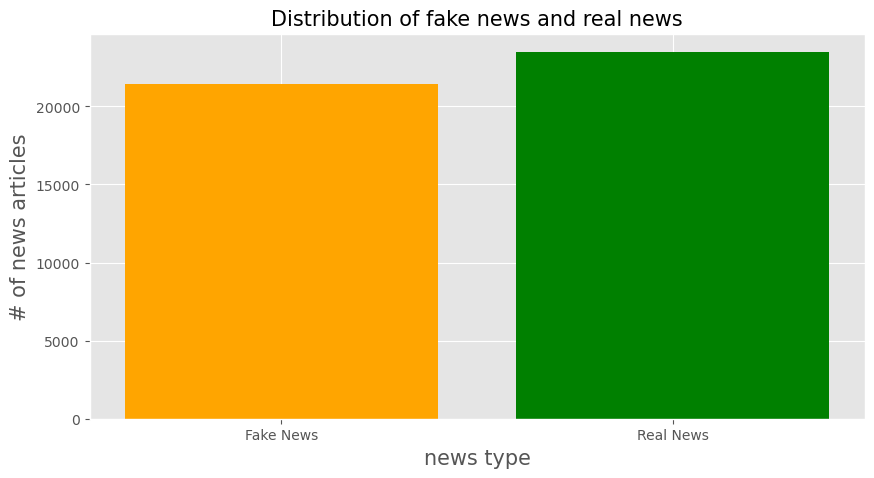

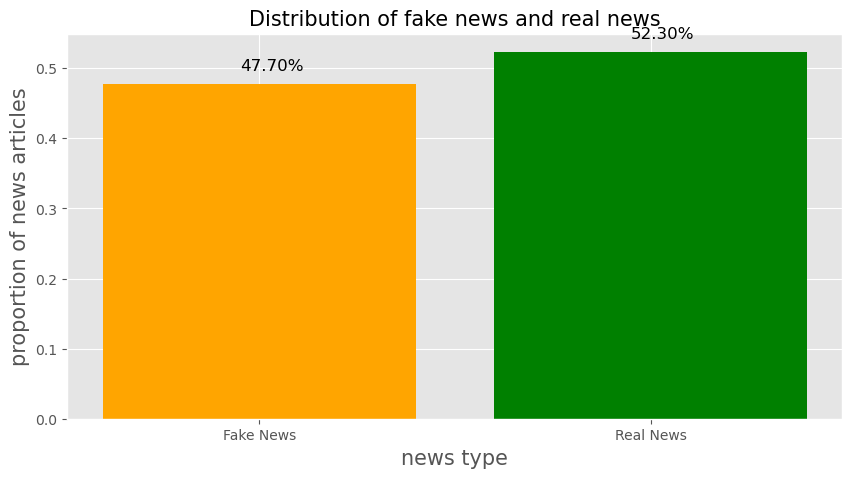

In [12]:
plt.figure(figsize=(10,5))
plt.bar('Fake News',len(fake_df),color='orange')
plt.bar('Real News',len(real_df),color='green')
    
plt.title('Distribution of fake news and real news',size=15)
plt.ylabel('# of news articles',size=15)
plt.xlabel('news type',size=15)

total_len =len(fake_df)+len(real_df)

plt.figure(figsize=(10,5))
plt.bar('Fake News',len(fake_df)/total_len,color='orange')

plt.text(-0.05, len(fake_df) / total_len + 0.02, f'{len(fake_df) / total_len:.2%}', color='black', size=12)
plt.bar('Real News',len(real_df)/total_len,color='green')

plt.text(0.95, len(real_df) / total_len + 0.02, f'{len(real_df) / total_len:.2%}', color='black', size=12)
plt.title('Distribution of fake news and real news',size=15)
plt.ylabel('proportion of news articles',size=15)
plt.xlabel('news type',size=15)

In [13]:
print("Difference in News articles:" , len(fake_df)-len(real_df))

Difference in News articles: -2064


In [14]:
new_df=pd.concat([fake_df,real_df],ignore_index=True,sort=False)
new_df.head()


,title,text,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [15]:
new_df["text"]=new_df["title"]+new_df['text']

new_df.drop('title',axis=1,inplace=True)

In [16]:
features=new_df['text']
targets=new_df['class']

X_train,X_test,y_train,y_test=train_test_split(features,targets,test_size=0.20,random_state=9)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(35918,) (8980,) (35918,) (8980,)


In [17]:


def normalize(data):
    normalized=[]
    for i in data:
        i=i.lower()
        i=re.sub("https?://S+|www\.\S+",'',i)
        i=re.sub("\\W",' ',i)
        i=re.sub("\n",'',i)
        i=re.sub(" +",' ',i)
        i=re.sub("^ ",'',i)
        i=re.sub(" $",'',i)
        normalized.append(i)
    return normalized

X_train=normalize(X_train)
X_test=normalize(X_test)

In [18]:
X_train_subset=[row[:10] for row in X_train]
X_train_subset

['indian pol',
 'hillary go',
 'breaking v',
 'in attacki',
 'seahawks s',
 'mexico pre',
 'republican',
 'china urge',
 'scars stri',
 'with new p',
 'trump humi',
 'just in be',
 'mata pires',
 'trump now ',
 'trump told',
 'taiwan pre',
 'great dona',
 'here s exa',
 'belgium s ',
 'europe cou',
 'how progre',
 'breaking m',
 'venezuela ',
 'spanish re',
 'sarah huck',
 'eleven inj',
 'trump says',
 'china give',
 'breaking p',
 'three libe',
 'trump heap',
 'watch stev',
 'china reit',
 'china says',
 'at scalia ',
 'city of ch',
 'wow conser',
 'here s the',
 'obama has ',
 'congress h',
 'audio mark',
 'illinois j',
 'white supr',
 'north caro',
 'health sec',
 'clinton ca',
 'hillary s ',
 'most unwan',
 'republican',
 'trump thre',
 'mylan ceo ',
 'paul ryan ',
 'republican',
 'our moral ',
 'biden pled',
 'failure of',
 'judge napo',
 'mexican hu',
 'burundi ta',
 'finland sa',
 'woohoo vet',
 'watch gera',
 'appeals co',
 'french min',
 'priceless ',
 'brexit pro',
 'turkey s

In [19]:
max_vocab=10000

tokenizer=Tokenizer(num_words=max_vocab)

tokenizer.fit_on_texts(X_train)

In [20]:
X_train=tokenizer.texts_to_sequences(X_train)

X_test=tokenizer.texts_to_sequences(X_test)

In [21]:
X_train=tf.keras.preprocessing.sequence.pad_sequences(X_train,padding="post",maxlen=256)
X_test=tf.keras.preprocessing.sequence.pad_sequences(X_test,padding="post",maxlen=256)

In [23]:
print(f"X_train :{X_train.shape} \nX_test: {X_test.shape}")

X_train :(35918, 256) 
X_test: (8980, 256)


In [27]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab,128),             
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(1e-4),
             metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_split=0.1,batch_size=30,shuffle=True,callbacks=[early_stop])

Epoch 1/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 202s 181ms/step - accuracy: 0.7756 - loss: 0.3741 - val_accuracy: 0.9769 - val_loss: 0.0709
Epoch 2/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 193s 179ms/step - accuracy: 0.9838 - loss: 0.0609 - val_accuracy: 0.9864 - val_loss: 0.0388
Epoch 3/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 191s 178ms/step - accuracy: 0.9950 - loss: 0.0214 - val_accuracy: 0.9889 - val_loss: 0.0423
Epoch 4/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 190s 176ms/step - accuracy: 0.9969 - loss: 0.0127 - val_accuracy: 0.9928 - val_loss: 0.0265
Epoch 5/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 1111s 1s/step - accuracy: 0.9977 - loss: 0.0070 - val_accuracy: 0.9908 - val_loss: 0.0356
Epoch 6/10
1078/1078 ━━━━━━━━━━━━━━━━━━━━ 70080s 65s/step - accuracy: 0.9983 - loss: 0.0074 - val_accuracy: 0.9919 - val_loss: 0.0310
